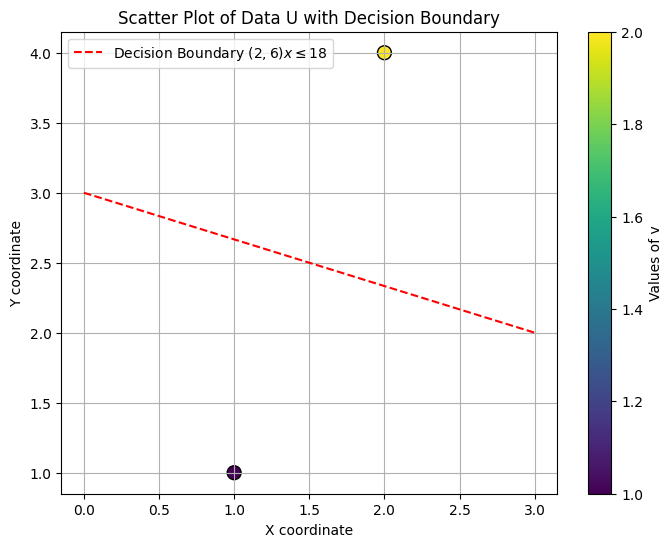

Simple train RMSE: 0.0
Simple test RMSE: 1.0
Pairs train RMSE: 0.0
Pairs test RMSE: 1.0


In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Directly embedding data into the script
# Using the specified points U = [1, 1] and V = [2, 4]
U = np.array([
    [1, 1],  # Represents u1
    [2, 4]   # Represents u2
])
v = np.array([1, 2])  # Target values associated with U

n = U.shape[0]
d = U.shape[1]
n_train = n // 2
n_test = n - n_train  # Ensures all data points are used even if not evenly divisible

# Split the data
v_train = v[:n_train]
v_test = v[n_train:]

# Simple model
X_simple = np.hstack((np.ones((n, 1)), U))
X_simple_train = X_simple[:n_train]
X_simple_test = X_simple[n_train:]

model_simple = LinearRegression().fit(X_simple_train, v_train)
simple_RMSE_train = np.sqrt(mean_squared_error(v_train, model_simple.predict(X_simple_train)))
simple_RMSE_test = np.sqrt(mean_squared_error(v_test, model_simple.predict(X_simple_test)))

# All pairs model might not make sense with only two data points, but for illustration:
X_all_pairs = np.zeros((n, 1 + d**2 + d))
X_all_pairs[:, 0] = 1  # Constant feature
X_all_pairs[:, 1:d+1] = U

# Compute all pairs
index = d + 1
for i in range(d):
    for j in range(i, d):
        X_all_pairs[:, index] = U[:, i] * U[:, j]
        index += 1

X_all_pairs_train = X_all_pairs[:n_train]
X_all_pairs_test = X_all_pairs[n_train:]

model_pairs = LinearRegression().fit(X_all_pairs_train, v_train)
pairs_RMSE_train = np.sqrt(mean_squared_error(v_train, model_pairs.predict(X_all_pairs_train)))
pairs_RMSE_test = np.sqrt(mean_squared_error(v_test, model_pairs.predict(X_all_pairs_test)))

# Coefficients for the decision boundary
a = np.array([2, 6])
b = 18

# Plotting the data U and V
plt.figure(figsize=(8, 6))
scatter = plt.scatter(U[:, 0], U[:, 1], c=v, s=100, cmap='viridis', edgecolors='k')
plt.colorbar(scatter, label='Values of v')

# Plot the decision boundary
# x2 = (-a1/a2)x1 + b/a2 where x = [x1, x2]
x = np.linspace(0, 3, 400)
y = (-a[0]/a[1]) * x + b / a[1]
plt.plot(x, y, 'r--', label='Decision Boundary $(2, 6)x \leq 18$')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Scatter Plot of Data U with Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

# Output RMSE results
print(f"Simple train RMSE: {simple_RMSE_train}")
print(f"Simple test RMSE: {simple_RMSE_test}")
print(f"Pairs train RMSE: {pairs_RMSE_train}")
print(f"Pairs test RMSE: {pairs_RMSE_test}")


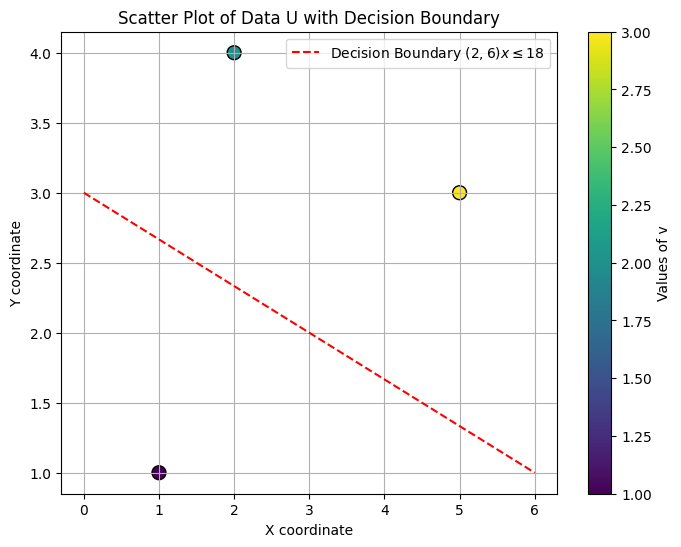

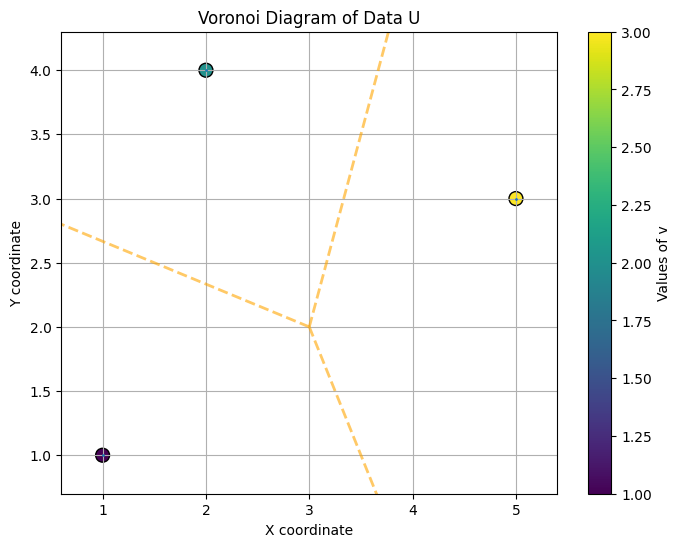

Simple train RMSE: 0.0
Simple test RMSE: 1.5811388300841898
Pairs train RMSE: 0.0
Pairs test RMSE: 1.5811388300841898


In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Directly embedding data into the script
# Using the specified points U = [1, 1], V = [2, 4], and adding [5, 3]
U = np.array([
    [1, 1],  # Represents u1
    [2, 4],  # Represents u2
    [5, 3]   # Represents u3
])
v = np.array([1, 2, 3])  # Target values associated with U

n = U.shape[0]
d = U.shape[1]
n_train = n // 2
n_test = n - n_train  # Ensures all data points are used even if not evenly divisible

# Split the data
v_train = v[:n_train]
v_test = v[n_train:]

# Simple model
X_simple = np.hstack((np.ones((n, 1)), U))
X_simple_train = X_simple[:n_train]
X_simple_test = X_simple[n_train:]

model_simple = LinearRegression().fit(X_simple_train, v_train)
simple_RMSE_train = np.sqrt(mean_squared_error(v_train, model_simple.predict(X_simple_train)))
simple_RMSE_test = np.sqrt(mean_squared_error(v_test, model_simple.predict(X_simple_test)))

# All pairs model might not make sense with only two data points, but for illustration:
X_all_pairs = np.zeros((n, 1 + d**2 + d))
X_all_pairs[:, 0] = 1  # Constant feature
X_all_pairs[:, 1:d+1] = U

# Compute all pairs
index = d + 1
for i in range(d):
    for j in range(i, d):
        X_all_pairs[:, index] = U[:, i] * U[:, j]
        index += 1

X_all_pairs_train = X_all_pairs[:n_train]
X_all_pairs_test = X_all_pairs[n_train:]

model_pairs = LinearRegression().fit(X_all_pairs_train, v_train)
pairs_RMSE_train = np.sqrt(mean_squared_error(v_train, model_pairs.predict(X_all_pairs_train)))
pairs_RMSE_test = np.sqrt(mean_squared_error(v_test, model_pairs.predict(X_all_pairs_test)))

# Coefficients for the decision boundary
a = np.array([2, 6])
b = 18

# Plotting the data U and V with the decision boundary
plt.figure(figsize=(8, 6))
scatter = plt.scatter(U[:, 0], U[:, 1], c=v, s=100, cmap='viridis', edgecolors='k')
plt.colorbar(scatter, label='Values of v')

# Plot the decision boundary
# x2 = (-a1/a2)x1 + b/a2 where x = [x1, x2]
x = np.linspace(0, 6, 400)
y = (-a[0]/a[1]) * x + b / a[1]
plt.plot(x, y, 'r--', label='Decision Boundary $(2, 6)x \leq 18$')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Scatter Plot of Data U with Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the Voronoi diagram separately
vor = Voronoi(U)
fig, ax = plt.subplots(figsize=(8, 6))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)

# Plot the points again on the Voronoi diagram for clarity
scatter = ax.scatter(U[:, 0], U[:, 1], c=v, s=100, cmap='viridis', edgecolors='k')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.set_title('Voronoi Diagram of Data U')
plt.colorbar(scatter, ax=ax, label='Values of v')
plt.grid(True)
plt.show()

# Output RMSE results
print(f"Simple train RMSE: {simple_RMSE_train}")
print(f"Simple test RMSE: {simple_RMSE_test}")
print(f"Pairs train RMSE: {pairs_RMSE_train}")
print(f"Pairs test RMSE: {pairs_RMSE_test}")
